In [1]:
import numpy as np
import pandas as pd

import random
import math

import matplotlib.pyplot as plt
import matplotlib as mpl
import urllib
import seaborn as sns
import scipy as sp

import scipy.stats as stats
from scipy import stats
from scipy.stats import binom
from scipy.stats import norm

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
df=df.drop(df.columns[0:1], axis=1) #불필요한 컬럼 삭제

In [6]:
# 데이터정보 확인
print(f'Shape of dataset: {df.shape} \n')
df.info()

Shape of dataset: (16598, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [7]:
# 결측치(missing value) 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [8]:
# 중복된 데이터 확인
df[df.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [9]:
df_clean = df.copy()

In [10]:
df_clean.drop_duplicates(); #중복데이터 제거

In [11]:
df_clean_errors1 = df_clean.dropna(axis=0) #결측치 제거(Year기준 0.016%로 제거해도 유의미하지 않을것으로 보고 삭제)
df_clean_errors1.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [12]:
df_clean_errors1[df_clean_errors1['Year'] > 1000].min() #이상치 확인 (1980~)

Name               '98 Koshien
Platform                  2600
Year                    1980.0
Genre                   Action
Publisher      10TACLE Studios
NA_Sales                     0
EU_Sales                     0
JP_Sales                     0
Other_Sales                  0
dtype: object

In [13]:
df_clean_errors1[df_clean_errors1['Year'] < 1000].sample(3) #이상치 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16482,Super Robot Taisen F Kanketsuhen,SAT,98.0,Strategy,Banpresto,0M,0,0.55,0
3020,Toaru Kagaku no Chou Denjihou,PSP,11.0,Adventure,Kadokawa Shoten,0,0,0.06,0
7627,Ys: The Oath in Felghana,PSP,10.0,Role-Playing,Falcom Corporation,0.09,0,0.04,0.01


In [14]:
clean_year = df_clean_errors1['Year'].astype(str).str[:-2] #str변환, 소수점이하 삭제
clean_year;

In [15]:
clean_year = clean_year.astype(int) #정수형으로 변환

In [16]:
df_clean_errors1['Year'] = clean_year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_clean_errors1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16241 non-null  object
 1   Platform     16241 non-null  object
 2   Year         16241 non-null  int64 
 3   Genre        16241 non-null  object
 4   Publisher    16241 non-null  object
 5   NA_Sales     16241 non-null  object
 6   EU_Sales     16241 non-null  object
 7   JP_Sales     16241 non-null  object
 8   Other_Sales  16241 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


In [18]:
df_clean_errors1.loc[df_clean_errors1['Year'] < 50, 'Year'] = (df_clean_errors1['Year'] + 2000)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [19]:
df_clean_errors1.loc[(df_clean_errors1['Year'] >= 50) & (df_clean_errors1['Year'] < 100) , 'Year'] = (df_clean_errors1['Year'] + 1900)

In [20]:
df_clean_errors1; #Year 컬럼의 이상치 수정완료

In [20]:
# k,m이 있는 데이터 -> k없애고 실수형전환해서 *0.001 / m없애고 실수형전환
# k,m이 없는 데이터는 그대로 출력 -> 최종 데이터의 단위는 M(million)

In [21]:
df_clean_errors2 = df_clean_errors1

In [22]:
def xx_yy(a):
    if 'K' in a:
        a = a.replace('K','')
        return float(a)/1000
    elif 'M' in a:
        a = a.replace('M','')
        return float(a)
    elif a in a:
        return float(a)

In [23]:
df_clean_errors2['NA_Sales'] = df_clean_errors1['NA_Sales'].apply(xx_yy)
df_clean_errors2['NA_Sales'];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_clean_errors2['EU_Sales'] = df_clean_errors1['EU_Sales'].apply(xx_yy)
df_clean_errors2['EU_Sales'];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_clean_errors2['JP_Sales'] = df_clean_errors1['JP_Sales'].apply(xx_yy)
df_clean_errors2['JP_Sales'];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_clean_errors2['Other_Sales'] = df_clean_errors1['Other_Sales'].apply(xx_yy)
df_clean_errors2['Other_Sales'];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_clean_errors2.sample(2)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16030,NFL Fever 2004,XB,2003,Sports,Microsoft Game Studios,0.24,0.07,0.00,0.01
11661,Romance of the Three Kingdoms II,SNES,1991,Strategy,Tecmo Koei,0.00,0.00,0.25,0.00


In [28]:
df_clean = df_clean_errors2 #출고량 단위 통일 완료(M,million)

In [28]:
a = df_clean.groupby('Genre',as_index=False)['NA_Sales'].sum() #북미지역의 장르별 출고량

In [29]:
b = df_clean.groupby('Genre',as_index=False)['EU_Sales'].sum() #유럽지역의 장르별 출고량

In [30]:
c = df_clean.groupby('Genre',as_index=False)['JP_Sales'].sum() #일본지역의 장르별 출고량

In [31]:
d = df_clean.groupby('Genre',as_index=False)['Other_Sales'].sum() #기타지역의 장르별 출고량

In [ ]:
# Q1. 지역에 따라서 선호하는 게임장르가 다를까? 가설검정 (변수2개이상 -> ANOVA)
# H0:지역에 따라 선호하는(max의 차이는) 게임장르는 같다.(통계적 유의하지 않다.) / H1:지역에 따라 선호하는(max의 차이는) 게임장르는 다르다.(통계적 유의하다.)
# 유의수준 0.05보다 작으면 귀무가설을 기각하고 대립가설이 성립한다. -> 시각화해서 확인

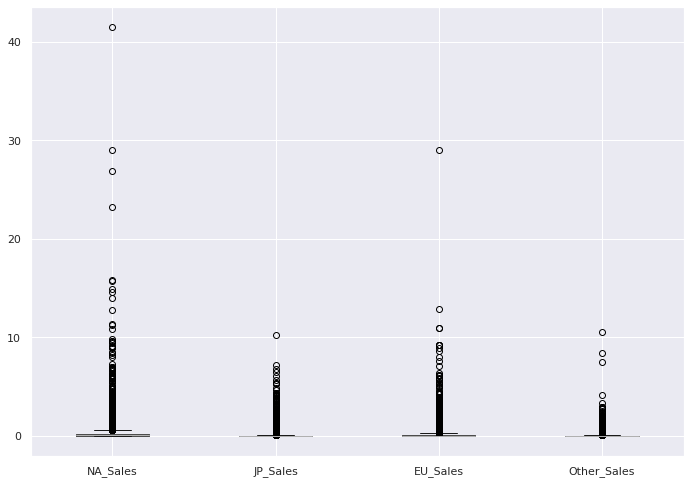

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
df_clean.boxplot(column=['NA_Sales','JP_Sales','EU_Sales','Other_Sales'])
plt.show()

In [ ]:
# boxplot에서 범주를 벗어난 이상치를 제거..?

In [30]:
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [31]:
df1 = df_clean.copy()

df1 = pd.melt(df1, id_vars=['Name'], value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], var_name='Area', value_name='Sales')
df1.head()

,Name,Area,Sales
0,Candace Kane's Candy Factory,NA_Sales,0.04
1,The Munchables,NA_Sales,0.17
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,NA_Sales,0.00
3,Deal or No Deal: Special Edition,NA_Sales,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,NA_Sales,0.12


In [32]:
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

# the "C" indicates categorical data
model = ols('Sales ~ C(Area)', df1).fit()

print(anova_lm(model))

               df        sum_sq     mean_sq           F  PR(>F)
C(Area)       3.0    452.296413  150.765471  565.496804     0.0
Residual  64960.0  17318.798129    0.266607         NaN     NaN


In [ ]:
# P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다. (지역마다 장르에 따른 판매량 차이가 있다고 볼 수 있다.)

In [33]:
Genre_sales = df_clean.groupby('Genre',as_index=False)[('NA_Sales','EU_Sales','JP_Sales','Other_Sales')].sum() #한줄로 
Genre_sales

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,858.75,513.64,156.60,183.99
1,Adventure,101.79,63.66,51.87,16.70
2,Fighting,220.35,99.90,87.14,36.15
3,Misc,394.73,208.15,104.18,72.64
4,Platform,445.38,200.63,130.53,51.45
5,Puzzle,121.58,50.47,56.24,12.44
6,Racing,354.70,235.02,56.32,76.51
7,Role-Playing,318.76,183.09,342.93,56.73
8,Shooter,574.48,310.23,38.18,101.86
9,Simulation,181.43,112.99,63.54,31.32


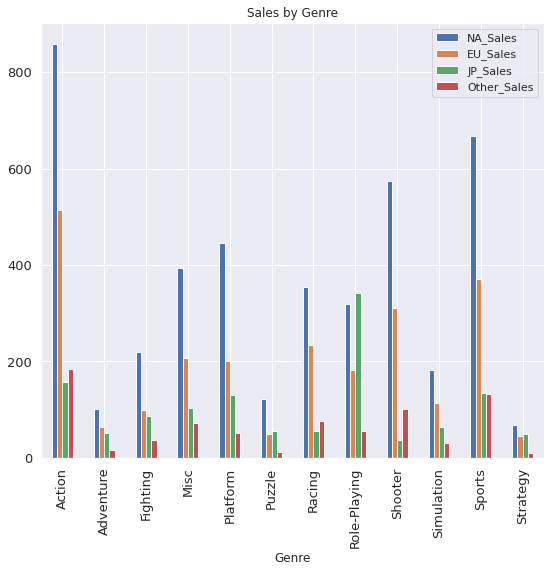

In [34]:
Genre_sales.plot(x="Genre", y=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"], kind="bar",figsize=(9,8), title='Sales by Genre', fontsize=13)
plt.show()

In [ ]:
# Q2.연도별 게임의 트렌드가 있을까? -> 시간의 흐름에 따라 장르, 플랫폼, 출고량 추세보기
# 장르별 출고량(sum) 컬럼추가
# 연도별 출고량(sum) 구하기

In [63]:
df_1=df_clean.loc[:,'NA_Sales':'Other_Sales']
df_2=df_1.sum(axis=1)
df_2;

In [55]:
df_3=df_clean.loc[:,'Year']

In [56]:
df_4=pd.concat([df_3, df_2], axis = 1)
df_4.tail()

,Year,0
16593,2006,0.20
16594,2005,0.01
16595,2015,0.79
16596,2013,0.38
16597,1996,0.17


In [58]:
df_4['Year'].astype(int);

In [59]:
df_5=df_4.groupby('Year',as_index=False).sum()
df_5.head(2)

,Year,0
0,1980,10.88
1,1981,35.68


In [60]:
df_6=df_5.rename(columns={0:'Sales'})

In [62]:
# 카이제곱검정
from scipy.stats import chisquare

chi1 = chisquare(df_6['Sales'], axis=None)
chi1

Power_divergenceResult(statistic=7508.490904096571, pvalue=0.0)

In [35]:
Year_sales = df_clean.groupby('Year')[('NA_Sales','EU_Sales','JP_Sales','Other_Sales')].sum().reset_index()
Year_sales

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980,10.13,0.64,0.00,0.11
1,1981,33.40,1.96,0.00,0.32
2,1982,26.92,1.65,0.00,0.31
3,1983,7.76,0.80,8.10,0.14
4,1984,33.28,2.10,14.27,0.70
5,1985,33.73,4.74,14.56,0.92
6,1986,12.50,2.84,19.81,1.93
7,1987,8.46,1.41,11.63,0.20
8,1988,23.87,6.59,15.76,0.99
9,1989,45.15,8.44,18.36,1.50


In [45]:
Year_sales['NA_Sales'].sum()

4307.04

In [46]:
Year_sales['EU_Sales'].sum()

2393.57

In [47]:
Year_sales['JP_Sales'].sum()

1271.39

In [48]:
Year_sales['Other_Sales'].sum()

783.37

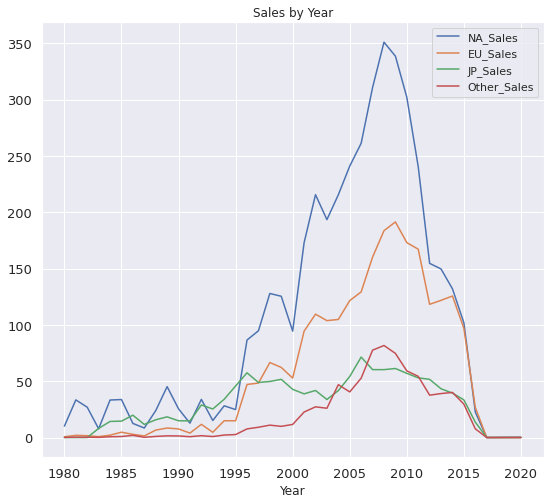

In [36]:
Year_sales.plot(x="Year", y=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"], kind='line',figsize=(9,8), title='Sales by Year', fontsize=13)
plt.show()

In [37]:
df_clean['Year_cut'] = 0
df_clean['Year_cut']=pd.cut(df_clean['Year'], bins=[1980,1985,1990,1995,2000,2005,2010,2015,2020], labels=['80-84','85-89','90-94','95-99','00-04','05-09','10-14','15-'])

In [38]:
df_clean.head(2)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_cut
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.0,0.0,0.00,05-09
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.0,0.0,0.01,05-09


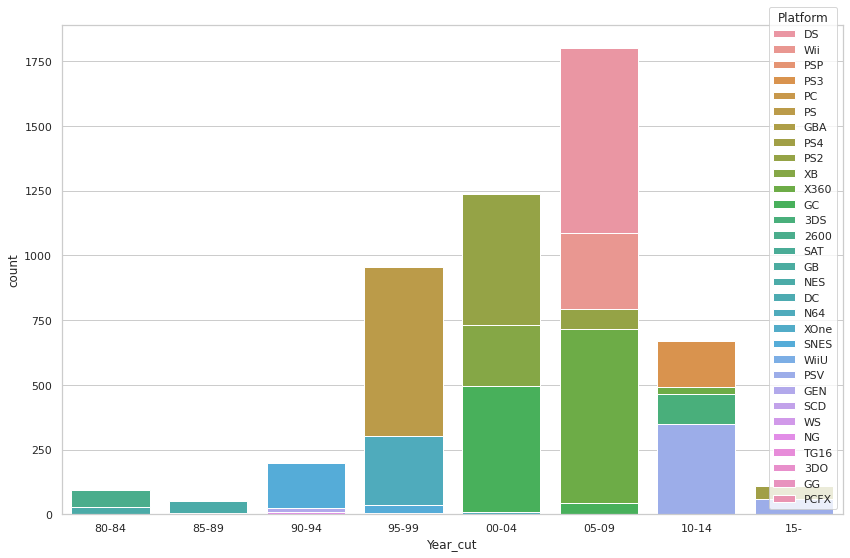

In [64]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,9))
sns.countplot(data=df_clean, x='Year_cut', hue='Platform', dodge=False)
plt.show()

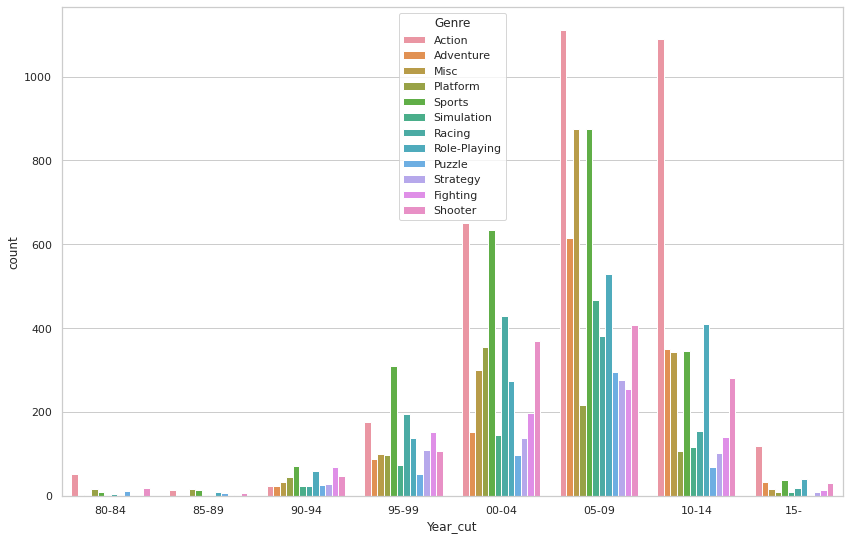

In [65]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,9))
sns.countplot(data=df_clean, x='Year_cut', hue='Genre')
plt.show()

In [ ]:
# Q3.출고량이 높은 게임에 대한 분석, 시각화하기

In [66]:
df_clean.head(2)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_cut,SUM
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.0,0.0,0.00,05-09,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.0,0.0,0.01,05-09,0.18


In [42]:
df_clean['SUM'] = df_clean["NA_Sales"] + df_clean['EU_Sales'] + df_clean['JP_Sales'] + df_clean['Other_Sales']

In [43]:
df_clean.head(2)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_cut,SUM
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.0,0.0,0.00,05-09,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.0,0.0,0.01,05-09,0.18


In [44]:
# 게임별 판매량(상위 10개)
game10 = df_clean.nlargest(10,'SUM',keep='all')
game10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_cut,SUM
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,05-09,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,80-84,40.24
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,05-09,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,05-09,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,95-99,31.38
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,85-89,30.26
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,05-09,30.01
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,05-09,29.01
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,05-09,28.61
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,80-84,28.31


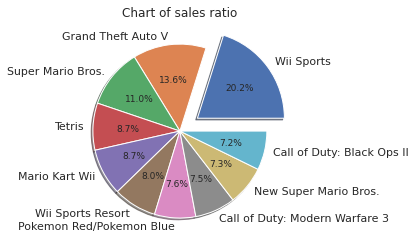

In [45]:
temp = df_clean.groupby('Name').sum()
temp = temp.sort_values(by='SUM', ascending=0)
temp = temp.iloc[:10]

mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
mpl.rcParams['font.size'] = 9
explode = (0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0) #조각이 갈라지는 것 표현 
plt.pie(temp['SUM'], labels=temp.index, autopct='%.1f%%', shadow=True, explode=explode)
plt.title('Chart of sales ratio')
plt.show()

In [46]:
# 지역별 게임 판매량(NA)
NA10 = df_clean.nlargest(10,'NA_Sales',keep='all')
NA10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_cut,SUM
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,05-09,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,80-84,40.24
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,80-84,28.31
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,85-89,30.26
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,05-09,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,05-09,33.00
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,05-09,21.82
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,05-09,28.61
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,05-09,29.01
13111,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,85-89,20.62


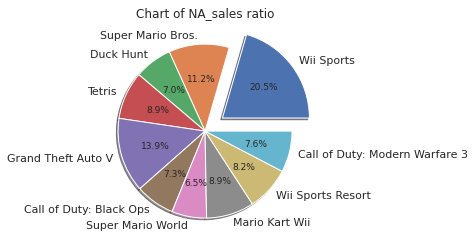

In [47]:
temp = df_clean.groupby('Name').sum()
temp = temp.sort_values(by='NA_Sales', ascending=0)
temp = temp.iloc[:10]

mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
mpl.rcParams['font.size'] = 9
explode = (0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0) #조각이 갈라지는 것 표현 
plt.pie(temp['SUM'], labels=temp.index, autopct='%.1f%%', shadow=True, explode=explode)
plt.title('Chart of NA_sales ratio')
plt.show()

In [48]:
# 지역별 게임 판매량(EU)
EU10 = df_clean.nlargest(10,'EU_Sales',keep='all')
EU10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_cut,SUM
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,05-09,82.74
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,05-09,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,05-09,33.00
11137,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,00-04,24.75
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,10-14,21.39
13229,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,00-04,20.22
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,05-09,30.01
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,05-09,29.01
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,95-99,31.38
10899,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,05-09,22.00


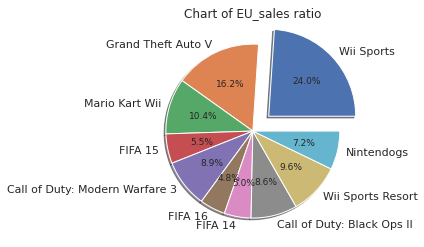

In [49]:
temp = df_clean.groupby('Name').sum()
temp = temp.sort_values(by='EU_Sales', ascending=0)
temp = temp.iloc[:10]

mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
mpl.rcParams['font.size'] = 9
explode = (0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0) #조각이 갈라지는 것 표현 
plt.pie(temp['SUM'], labels=temp.index, autopct='%.1f%%', shadow=True, explode=explode)
plt.title('Chart of EU_sales ratio')
plt.show()

In [50]:
# 지역별 게임 판매량(JP)
JP10 = df_clean.nlargest(10,'JP_Sales',keep='all')
JP10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_cut,SUM
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,95-99,31.38
9416,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,95-99,23.09
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,80-84,40.24
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,05-09,30.01
10555,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,05-09,18.35
10621,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,05-09,15.32
10917,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,00-04,15.84
3273,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55,3.52,5.33,0.88,00-04,12.28
511,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,00-04,15.30
1847,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00,05-09,4.87


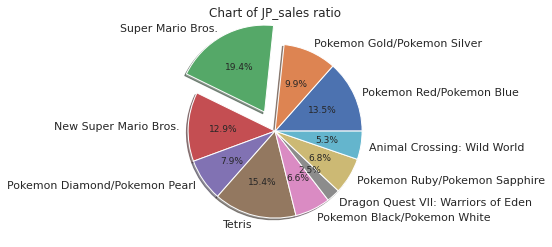

In [51]:
temp = df_clean.groupby('Name').sum()
temp = temp.sort_values(by='JP_Sales', ascending=0)
temp = temp.iloc[:10]

mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
mpl.rcParams['font.size'] = 9
explode = (0, 0, 0.25, 0, 0, 0, 0, 0, 0, 0) #조각이 갈라지는 것 표현 
plt.pie(temp['SUM'], labels=temp.index, autopct='%.1f%%', shadow=True, explode=explode)
plt.title('Chart of JP_sales ratio')
plt.show()

In [52]:
# 지역별 게임 판매량(Other)
Other10 = df_clean.nlargest(10,'Other_Sales',keep='all')
Other10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_cut,SUM
14669,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,00-04,20.81
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,05-09,82.74
14665,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,00-04,11.65
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,10-14,21.39
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,05-09,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,05-09,33.00
8213,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,05-09,3.62
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,05-09,30.01
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,05-09,29.01
11137,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,00-04,24.75


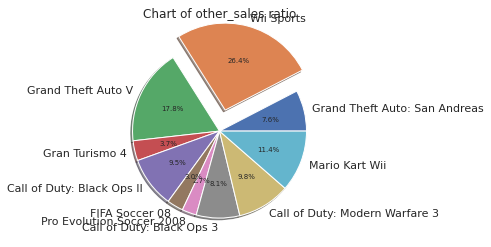

In [53]:
temp = df_clean.groupby('Name').sum()
temp = temp.sort_values(by='Other_Sales', ascending=0)
temp = temp.iloc[:10]

mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
mpl.rcParams['font.size'] = 7
explode = (0, 0.25, 0, 0, 0, 0, 0, 0, 0, 0) #조각이 갈라지는 것 표현 
plt.pie(temp['SUM'], labels=temp.index, autopct='%.1f%%', shadow=True, explode=explode)
plt.title('Chart of other_sales ratio')
plt.show()